In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
!pwd

/content


In [33]:
# Specify the path to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/ml_datasets/Archive.zip'
extracted_path = '/content/dataset/'

# Unzip the dataset
!unzip -q $zip_file_path -d $extracted_path

replace /content/dataset/test/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [37]:
base_path = '/content/dataset/'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')


In [38]:
print("Base Path:", base_path)
print("Train Path:", train_path)
print("Test Path:", test_path)
print("Validation Path:", val_path)

Base Path: /content/dataset/
Train Path: /content/dataset/train
Test Path: /content/dataset/test
Validation Path: /content/dataset/val


In [39]:
#Create data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # adjust size as needed
    batch_size=32,
    class_mode='binary'  # 'binary' for two classes (Pneumonia and Normal)
)


Found 5216 images belonging to 2 classes.


In [40]:
# Create data generators with rescaling for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [41]:
#Import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [42]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
#checking the sample and batch size for tranning purpose
print("Number of samples in the training set:", train_generator.samples)
print("Number of samples in the training set:", val_generator.samples)

Number of samples in the training set: 5216
Number of samples in the training set: 16


In [45]:
# Train the model using the training generator
dh = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 [==============================] - 713s 4s/step - loss: 0.3278 - accuracy: 0.8618 - val_loss: 0.4633 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 715s 4s/step - loss: 0.2204 - accuracy: 0.9068 - val_loss: 1.1002 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 715s 4s/step - loss: 0.2046 - accuracy: 0.9166 - val_loss: 0.4878 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 726s 4s/step - loss: 0.1640 - accuracy: 0.9356 - val_loss: 0.8506 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 731s 4s/step - loss: 0.1725 - accuracy: 0.9321 - val_loss: 0.8558 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 742s 5s/step - loss: 0.1502 - accuracy: 0.9387 - val_loss: 0.4489 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 717s 4s/step - loss: 0.1495 - accuracy: 0.9438 - val_loss: 0.5824 - val_accuracy: 0.7500

In [48]:
#Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

eval_result = model.evaluate(test_generator)
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])


Found 624 images belonging to 2 classes.
20/20 [==============================] - 26s 1s/step - loss: 0.4437 - accuracy: 0.8606
Test Loss: 0.44371315836906433
Test Accuracy: 0.8605769276618958


In [49]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# Assuming you have the test generator set up with the correct target size, batch size, etc.
# You don't need to specify steps if your test set is small enough to fit in memory
# If you have a large test set that doesn't fit in memory, consider using a loop and accumulating predictions.

# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predicted probabilities to classes
predicted_classes = (predictions > 0.5).astype(int)

# Get true labels from the test generator
true_labels = test_generator.classes

# Map class indices to class labels
class_labels = list(test_generator.class_indices.keys())

# Generate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Generate Classification Report
class_report = classification_report(true_labels, predicted_classes, target_names=class_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


20/20 [==============================] - 40s 1s/step
Confusion Matrix:
[[ 71 163]
 [ 90 300]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.44      0.30      0.36       234
   PNEUMONIA       0.65      0.77      0.70       390

    accuracy                           0.59       624
   macro avg       0.54      0.54      0.53       624
weighted avg       0.57      0.59      0.57       624



In [51]:
!pip install matplotlib seaborn scikit-learn

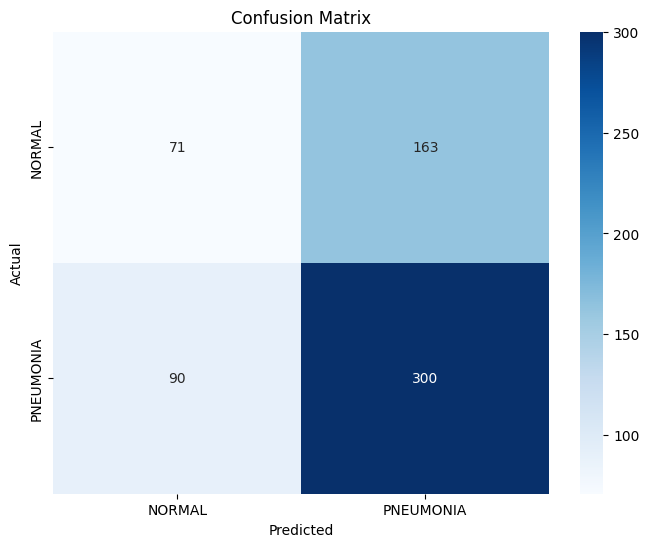

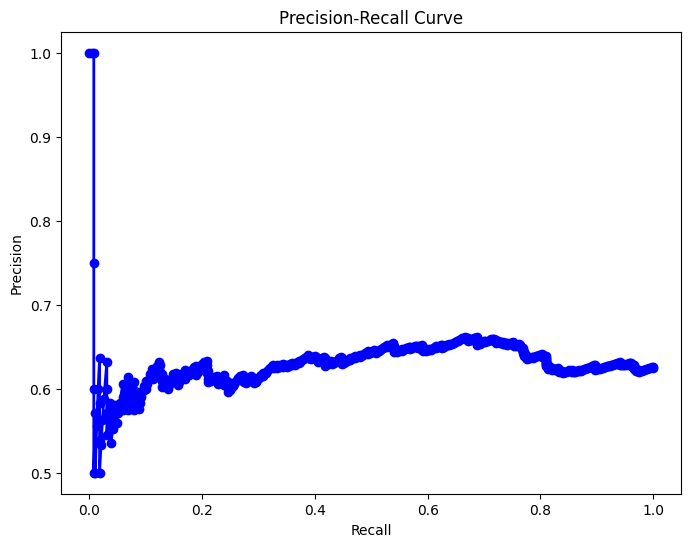

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# Assuming you have true_labels, predicted_classes, and class_labels defined

# Generate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Generate Classification Report
class_report = classification_report(true_labels, predicted_classes, target_names=class_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, predictions)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', marker='o', linestyle='-', linewidth=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
